<a href="https://colab.research.google.com/github/AminTalukder/Web-Pages/blob/main/Big_Mart_Sells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
from google.colab import drive

In [149]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

train_data=pd.read_csv('/content/drive/MyDrive/Projects/Train.csv')
test_data=pd.read_csv('/content/drive/MyDrive/Projects/Test.csv')


In [151]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [152]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [153]:
#data_type attributes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [154]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [155]:
#finding the percentage of NaN values in each feature
features_with_na=[features for features in train_data.columns if train_data[features].isnull().sum()>1]
for feature in features_with_na:
  print(feature, np.round(train_data[feature].isnull().mean(),2),'% missing values')

Item_Weight 0.17 % missing values
Outlet_Size 0.28 % missing values


In [156]:
#dropping irrelevent columns
train_data.drop(['Item_Identifier'],axis=1,inplace=True)
train_data.drop(['Outlet_Identifier'],axis=1,inplace=True)
#train_data.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

In [157]:
#printing categorical columns with value count
cat_col=[]
for x in train_data.dtypes.index:
  if train_data.dtypes[x]=='object':
    cat_col.append(x)

for col in cat_col:
  print(col)
  print(train_data[col].value_counts())
  print()


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [158]:
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
train_data['Item_Fat_Content'].value_counts()

test_data['Item_Fat_Content']=test_data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
test_data['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [159]:
#filling null values in training set
train_data["Item_Weight"].fillna(train_data["Item_Weight"].mean(), inplace=True)
#filling null values in testing set
test_data["Item_Weight"].fillna(test_data["Item_Weight"].mean(), inplace=True)

In [160]:

#filling null values in training set
train_data["Outlet_Size"].fillna(train_data["Outlet_Size"].mode()[0], inplace=True)
#filling null values in testing set
test_data["Outlet_Size"].fillna(test_data["Outlet_Size"].mode()[0], inplace=True)

In [161]:
train_data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [162]:
#filling 0 values in training set
train_data.loc[:, 'Item_Visibility'].replace([0],[train_data['Item_Visibility'].mean()],inplace=True)
#filling 0 values in testing set
test_data.loc[:,'Item_Visibility'].replace([0],[test_data['Item_Visibility'].mean()],inplace=True)

**Level Encoding**

**Visualization on categorical features**


In [163]:
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

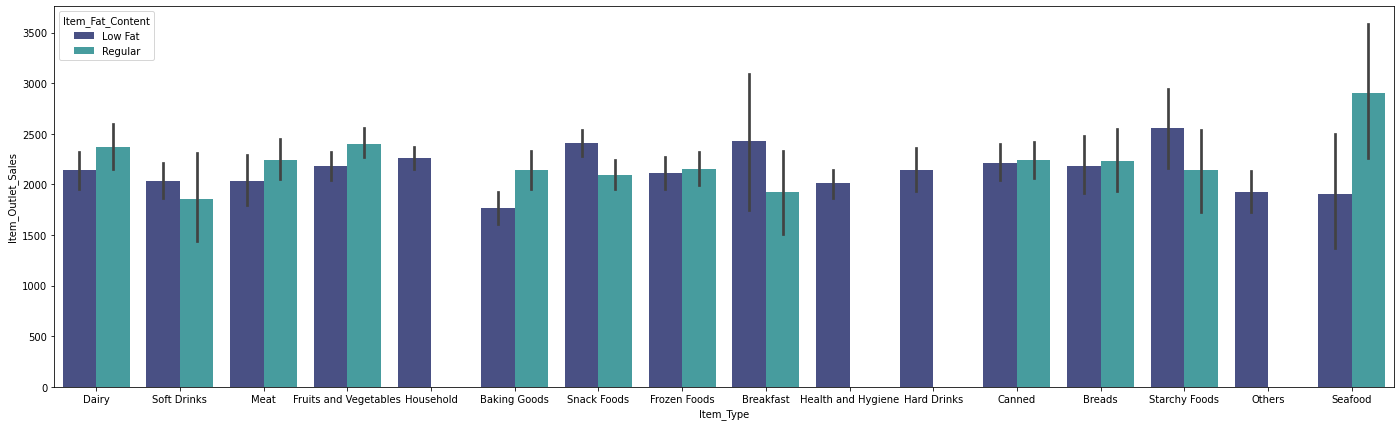

In [164]:
plt.figure(figsize=(24,7))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=train_data, palette='mako')
plt.show()

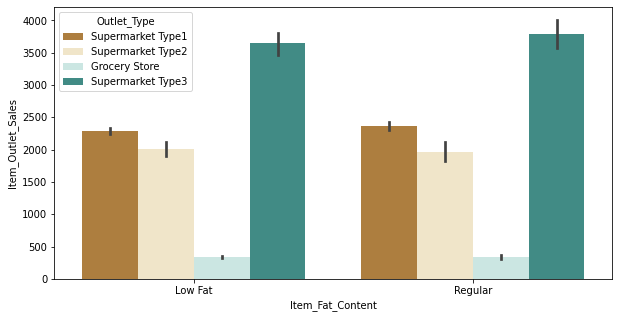

In [165]:
plt.figure(figsize=(10,5))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales',data=train_data,hue='Outlet_Type',palette='BrBG')
plt.show()

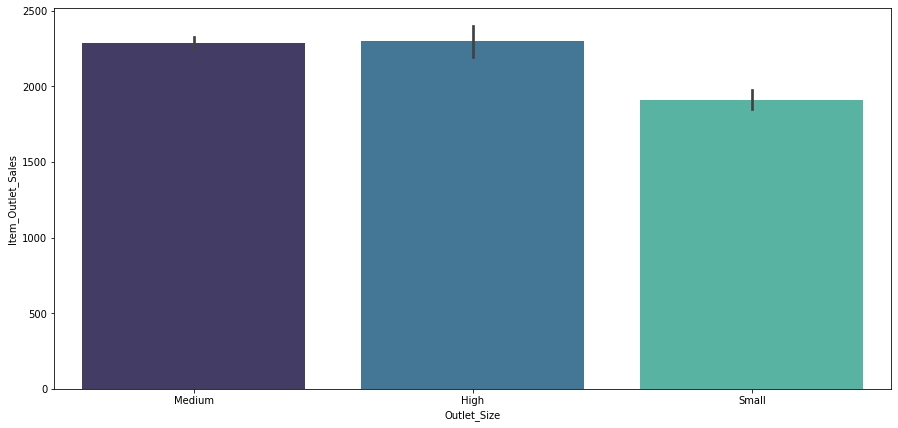

In [166]:
plt.figure(figsize=(15,7))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train_data, palette='mako')
plt.show()

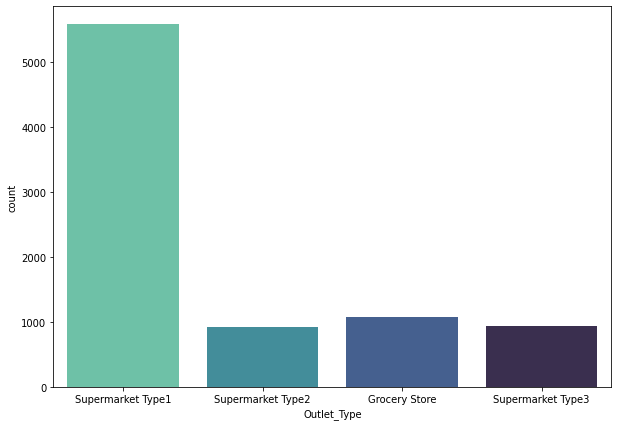

In [167]:
plt.figure(figsize=(10,7))
sns.countplot(x='Outlet_Type',data=train_data,palette='mako_r')
plt.show()

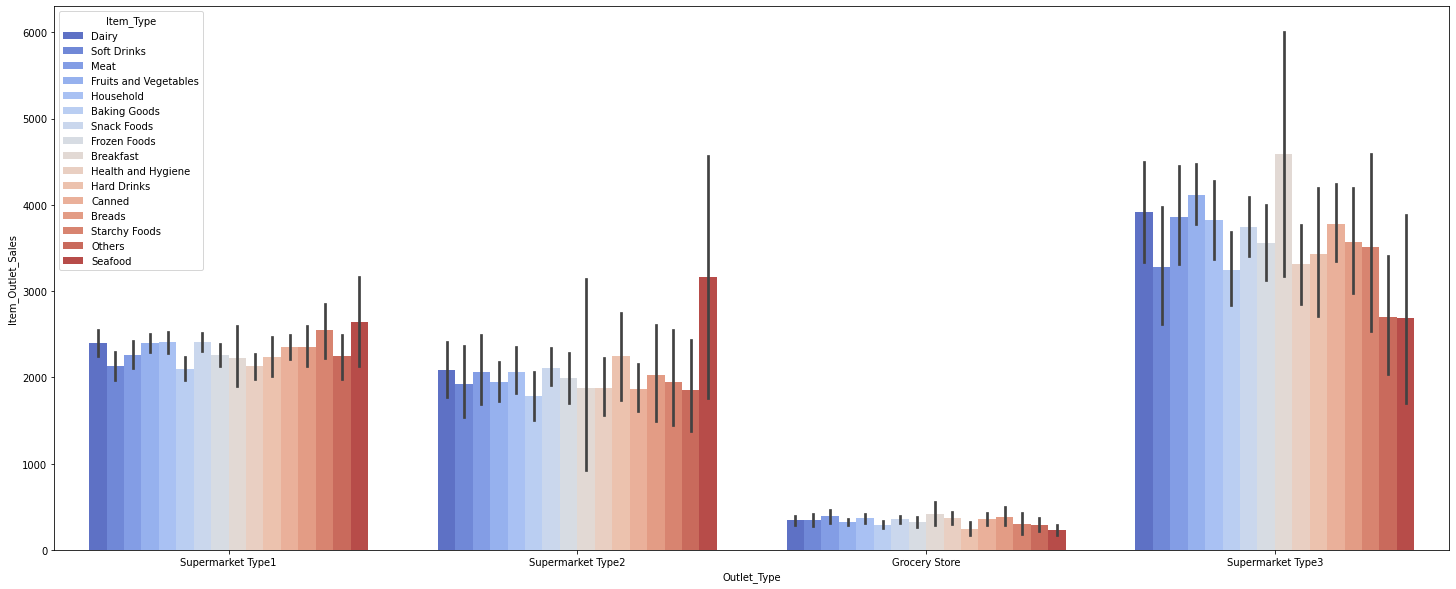

In [168]:
plt.figure(figsize=(25,10))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Item_Type',data=train_data, palette='coolwarm')
plt.show()

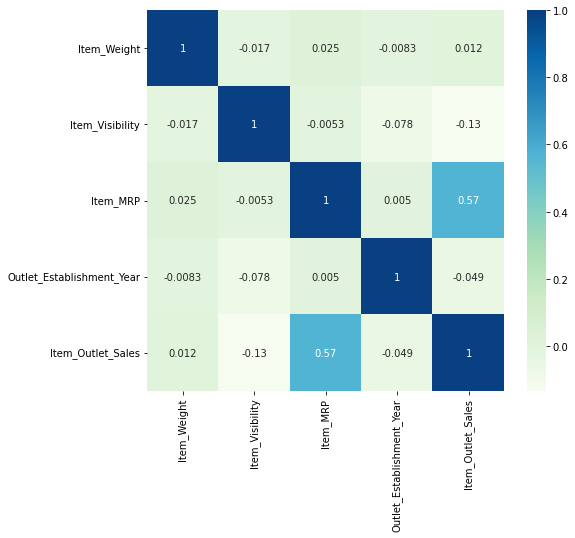

In [169]:
plt.figure(figsize=(8,7))
sns.heatmap(train_data.corr() ,cmap='GnBu', annot=True)
plt.show()

In [171]:
cat_col1=[]
for x in train_data.dtypes.index:
  if train_data.dtypes[x]!='object':
    cat_col1.append(x)
cat_col1

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']